<a href="https://colab.research.google.com/github/goldiezhu/BIS634/blob/main/A4/E2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

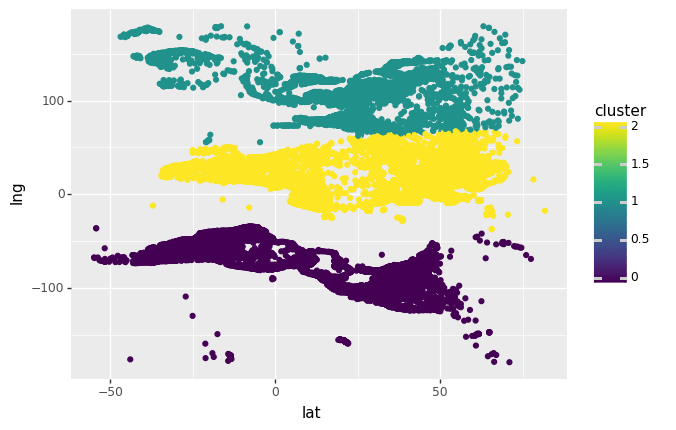

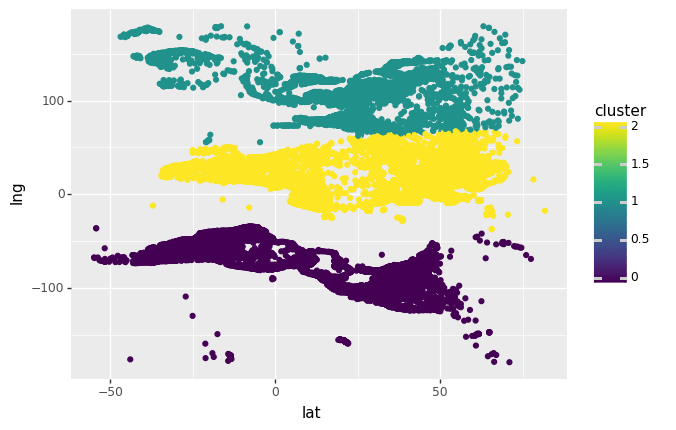

In [41]:
import pandas as pd
import plotnine as p9
import random
import numpy as np
k=3
df = pd.read_csv('worldcities.csv')
def normalize(series):
    return (series - series.mean()) / series.std()

pts = [np.array(pt) for pt in zip(df['lat'], df['lng'])]
centers = random.sample(pts, k)
old_cluster_ids, cluster_ids = None, [] # arbitrary but different
while cluster_ids != old_cluster_ids:
    old_cluster_ids = list(cluster_ids)
    cluster_ids = []
    for pt in pts:
        min_cluster = -1
        min_dist = float('inf')
        for i, center in enumerate(centers):
            dist = np.linalg.norm(pt - center)
            if dist < min_dist:
                min_cluster = i
                min_dist = dist
        cluster_ids.append(min_cluster)
    df['cluster'] = cluster_ids
    cluster_pts = [[pt for pt, cluster in zip(pts, cluster_ids) if cluster == match]
        for match in range(k)]
    centers = [sum(pts)/len(pts) for pts in cluster_pts]
(p9.ggplot(df, p9.aes(x="lat", y="lng", color="cluster")) 
    + p9.geom_point()).draw()

In [42]:
coordinate_pairs = []
for cluster in range(k):
  clusters = [np.array(pt) for pt in zip(df[df['cluster']==cluster]['lat'], df[df['cluster']== cluster]['lng'])]
  coordinate_pairs.append(clusters)

In [ ]:
!pip3 install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Cartopy-0.21.0.tar.gz (10.9 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  Using cached Cartopy-0.20.3.tar.gz (10.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  Using cached Cartopy-0.20.2.tar.gz (10.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  Using cached Cartopy-0.20.1.tar.gz (10.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  Using cached Cartopy-0.20.0.tar.gz (10.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  Using cached Cartopy-0.19.0.post1.tar.gz (12.1 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 46

ERROR:shapely.geos:Geometry must be a Point or LineString


In [1]:
!pip uninstall shapely
!pip install shapely --no-binary shapely

Found existing installation: Shapely 1.8.5.post1
Uninstalling Shapely-1.8.5.post1:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/Shapely-1.8.5.post1.dist-info/*
    /usr/local/lib/python3.8/dist-packages/Shapely.libs/libgeos-35e678a0.so.3.10.3
    /usr/local/lib/python3.8/dist-packages/Shapely.libs/libgeos_c-c8ec7514.so.1.16.1
    /usr/local/lib/python3.8/dist-packages/shapely/*
Proceed (y/n)? y
  Successfully uninstalled Shapely-1.8.5.post1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 200 kB 4.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.5.post1-cp38-cp38-linux_x86_64.whl size=755468 sha256=b542f4652d65d9f223a790f2af8e8d758141bfe0dda7857ef93f6ac508329a7d
  Stored in directory: /root/.cache/pip/wheels/

/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.


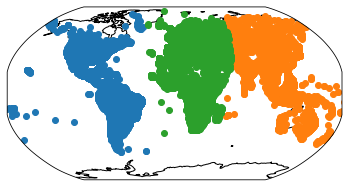

In [43]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import random 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
lats = [pt[0] for pt in pts]
lngs = [pt[1] for pt in pts]
ax.coastlines()
for j in range(k):
  lats = [pt[0] for pt in coordinate_pairs[j]]
  lngs = [pt[1] for pt in coordinate_pairs[j]]
  ax.plot(lngs, lats, "o", transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
plt.show()

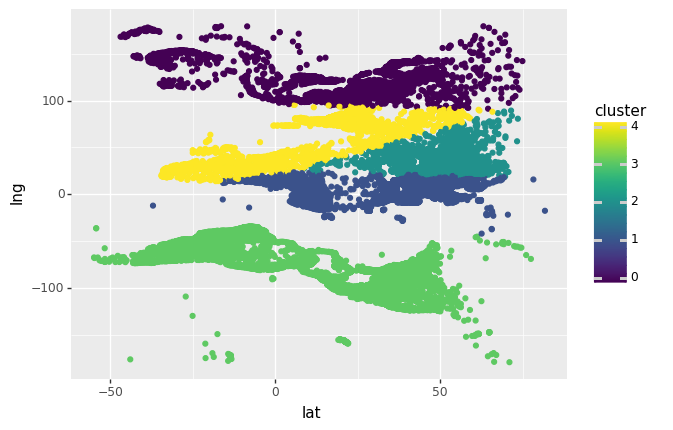

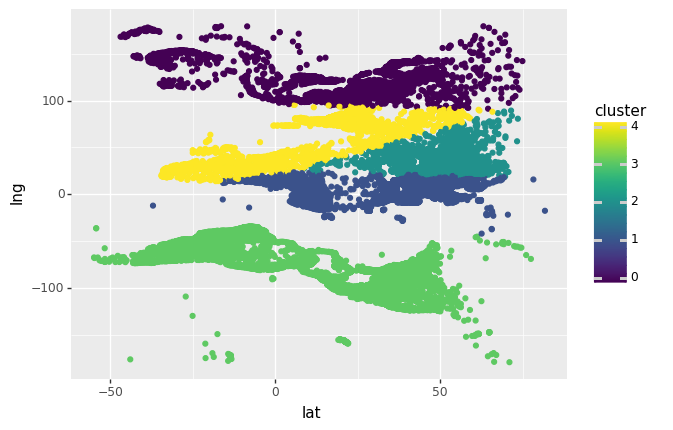

In [47]:

k=5

pts = [np.array(pt) for pt in zip(df['lat'], df['lng'])]
centers = random.sample(pts, k)
old_cluster_ids, cluster_ids = None, [] # arbitrary but different
while cluster_ids != old_cluster_ids:
    old_cluster_ids = list(cluster_ids)
    cluster_ids = []
    for pt in pts:
        min_cluster = -1
        min_dist = float('inf')
        for i, center in enumerate(centers):
            dist = np.linalg.norm(pt - center)
            if dist < min_dist:
                min_cluster = i
                min_dist = dist
        cluster_ids.append(min_cluster)
    df['cluster'] = cluster_ids
    cluster_pts = [[pt for pt, cluster in zip(pts, cluster_ids) if cluster == match]
        for match in range(k)]
    centers = [sum(pts)/len(pts) for pts in cluster_pts]
(p9.ggplot(df, p9.aes(x="lat", y="lng", color="cluster")) 
    + p9.geom_point()).draw()


In [48]:
coordinate_pairs = []
for cluster in range(k):
  clusters = [np.array(pt) for pt in zip(df[df['cluster']==cluster]['lat'], df[df['cluster']== cluster]['lng'])]
  coordinate_pairs.append(clusters)

/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.


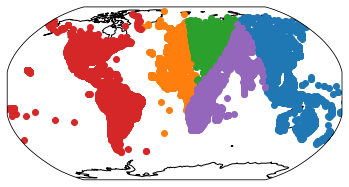

In [49]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
lats = [pt[0] for pt in pts]
lngs = [pt[1] for pt in pts]
ax.coastlines()
for j in range(5):
  lats = [pt[0] for pt in coordinate_pairs[j]]
  lngs = [pt[1] for pt in coordinate_pairs[j]]
  ax.plot(lngs, lats, "o", transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
plt.show()

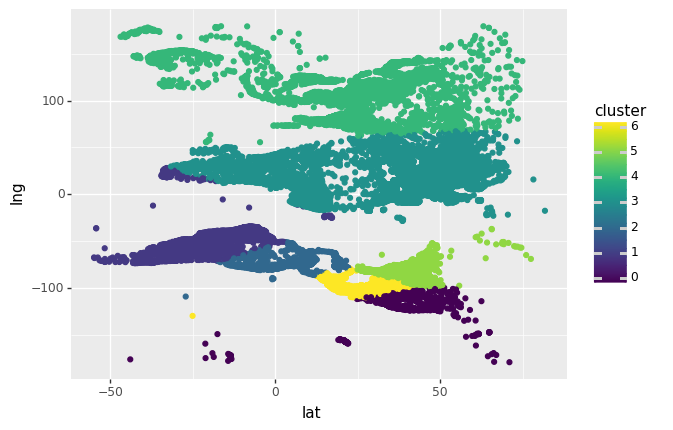

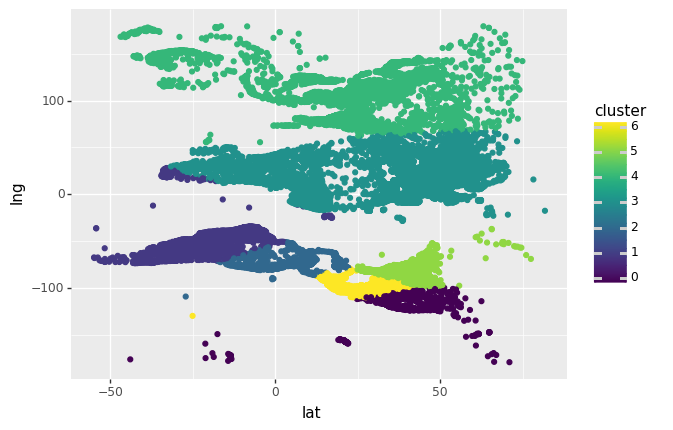

In [53]:

k=7

pts = [np.array(pt) for pt in zip(df['lat'], df['lng'])]
centers = random.sample(pts, k)
old_cluster_ids, cluster_ids = None, [] # arbitrary but different
while cluster_ids != old_cluster_ids:
    old_cluster_ids = list(cluster_ids)
    cluster_ids = []
    for pt in pts:
        min_cluster = -1
        min_dist = float('inf')
        for i, center in enumerate(centers):
            dist = np.linalg.norm(pt - center)
            if dist < min_dist:
                min_cluster = i
                min_dist = dist
        cluster_ids.append(min_cluster)
    df['cluster'] = cluster_ids
    cluster_pts = [[pt for pt, cluster in zip(pts, cluster_ids) if cluster == match]
        for match in range(k)]
    centers = [sum(pts)/len(pts) for pts in cluster_pts]
(p9.ggplot(df, p9.aes(x="lat", y="lng", color="cluster")) 
    + p9.geom_point()).draw()


In [54]:
coordinate_pairs = []
for cluster in range(k):
  clusters = [np.array(pt) for pt in zip(df[df['cluster']==cluster]['lat'], df[df['cluster']== cluster]['lng'])]
  coordinate_pairs.append(clusters)

/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.


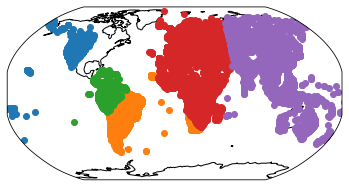

In [55]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
lats = [pt[0] for pt in pts]
lngs = [pt[1] for pt in pts]
ax.coastlines()
for j in range(5):
  lats = [pt[0] for pt in coordinate_pairs[j]]
  lngs = [pt[1] for pt in coordinate_pairs[j]]
  ax.plot(lngs, lats, "o", transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
plt.show()

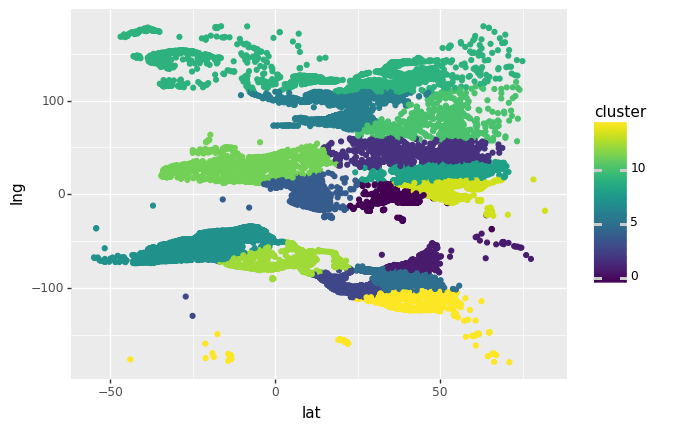

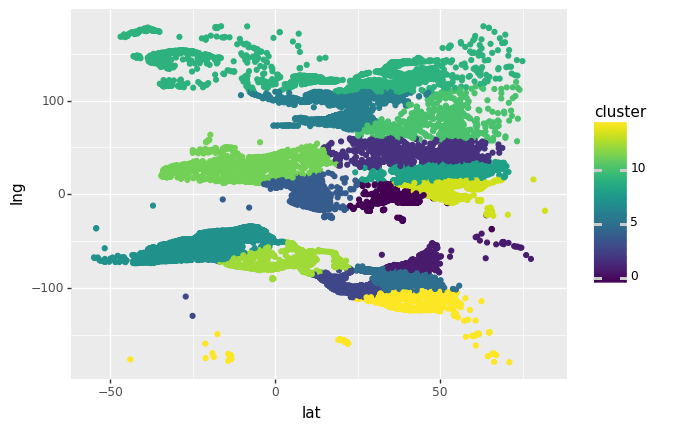

In [31]:

k=15

pts = [np.array(pt) for pt in zip(df['lat'], df['lng'])]
centers = random.sample(pts, k)
old_cluster_ids, cluster_ids = None, [] # arbitrary but different
while cluster_ids != old_cluster_ids:
    old_cluster_ids = list(cluster_ids)
    cluster_ids = []
    for pt in pts:
        min_cluster = -1
        min_dist = float('inf')
        for i, center in enumerate(centers):
            dist = np.linalg.norm(pt - center)
            if dist < min_dist:
                min_cluster = i
                min_dist = dist
        cluster_ids.append(min_cluster)
    df['cluster'] = cluster_ids
    cluster_pts = [[pt for pt, cluster in zip(pts, cluster_ids) if cluster == match]
        for match in range(k)]
    centers = [sum(pts)/len(pts) for pts in cluster_pts]
(p9.ggplot(df, p9.aes(x="lat", y="lng", color="cluster")) 
    + p9.geom_point()).draw()


In [32]:
coordinate_pairs = []
for cluster in range(k):
  clusters = [np.array(pt) for pt in zip(df[df['cluster']==cluster]['lat'], df[df['cluster']== cluster]['lng'])]
  coordinate_pairs.append(clusters)

/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.


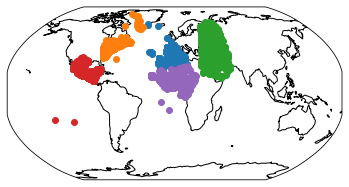

In [33]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
lats = [pt[0] for pt in pts]
lngs = [pt[1] for pt in pts]
ax.coastlines()
for j in range(5):
  lats = [pt[0] for pt in coordinate_pairs[j]]
  lngs = [pt[1] for pt in coordinate_pairs[j]]
  ax.plot(lngs, lats, "o", transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
plt.show()

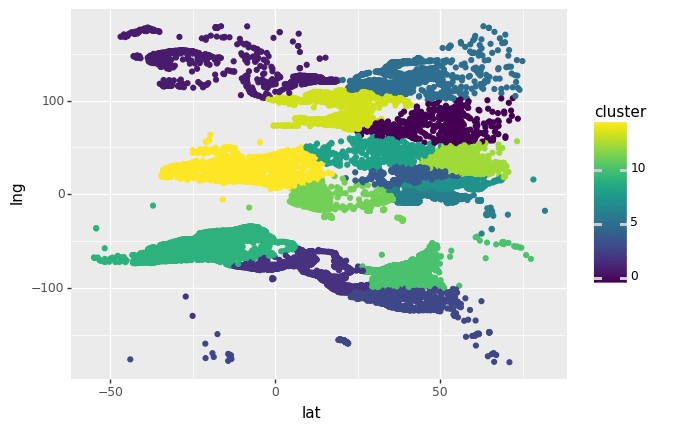

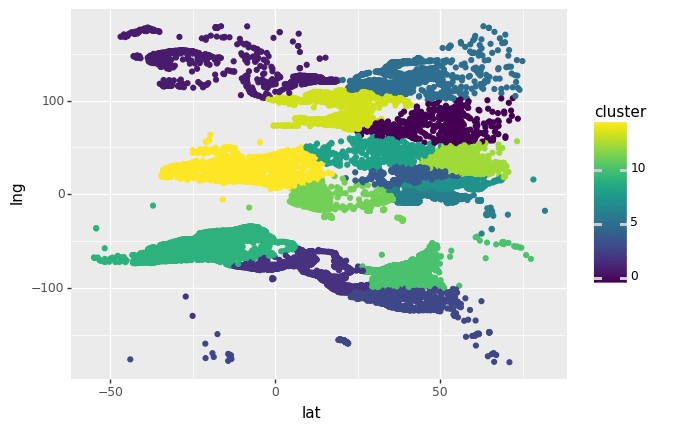

In [59]:

k=15

pts = [np.array(pt) for pt in zip(df['lat'], df['lng'])]
centers = random.sample(pts, k)
old_cluster_ids, cluster_ids = None, [] # arbitrary but different
while cluster_ids != old_cluster_ids:
    old_cluster_ids = list(cluster_ids)
    cluster_ids = []
    for pt in pts:
        min_cluster = -1
        min_dist = float('inf')
        for i, center in enumerate(centers):
            dist = np.linalg.norm(pt - center)
            if dist < min_dist:
                min_cluster = i
                min_dist = dist
        cluster_ids.append(min_cluster)
    df['cluster'] = cluster_ids
    cluster_pts = [[pt for pt, cluster in zip(pts, cluster_ids) if cluster == match]
        for match in range(k)]
    centers = [sum(pts)/len(pts) for pts in cluster_pts]
(p9.ggplot(df, p9.aes(x="lat", y="lng", color="cluster")) 
    + p9.geom_point()).draw()


In [60]:
coordinate_pairs = []
for cluster in range(k):
  clusters = [np.array(pt) for pt in zip(df[df['cluster']==cluster]['lat'], df[df['cluster']== cluster]['lng'])]
  coordinate_pairs.append(clusters)

/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.


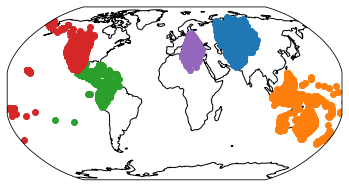

In [61]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
lats = [pt[0] for pt in pts]
lngs = [pt[1] for pt in pts]
ax.coastlines()
for j in range(5):
  lats = [pt[0] for pt in coordinate_pairs[j]]
  lngs = [pt[1] for pt in coordinate_pairs[j]]
  ax.plot(lngs, lats, "o", transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
plt.show()